In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from collections import Counter
from ast import literal_eval

In [16]:
try:
    from framework import WordleAnalyzer
    print("Imported 'framework' module successfully.")
except ImportError:
    print("Importing WordleAnalyzer from parent directory...")
    os.chdir("../")
    print(f"Changed dir to {os.getcwd()}")
    from framework import WordleAnalyzer
    print("Imported 'framework' module successfully.")


Imported 'framework' module successfully.


In [3]:
analyzer = WordleAnalyzer(r'data\merged_data.csv',\
    load_pickle=True, avg_dec_place=2, specific_dec_places={"actual_avg_word2vec_distance": 1, "optimal_avg_word2vec_distance": 1,"actual_avg_glove_distance": 1, \
                                                            "optimal_avg_glove_distance": 1, "actual_avg_shared_chars": 0, "optimal_avg_shared_chars": 0, \
                                                            "actual_avg_levenshtein": 0, "optimal_avg_levenshtein": 0})

Loading data...
Preprocessing data...


Plotting comparison histogram for avg_levenshtein...


100%|██████████| 65271/65271 [00:00<00:00, 535217.48it/s]


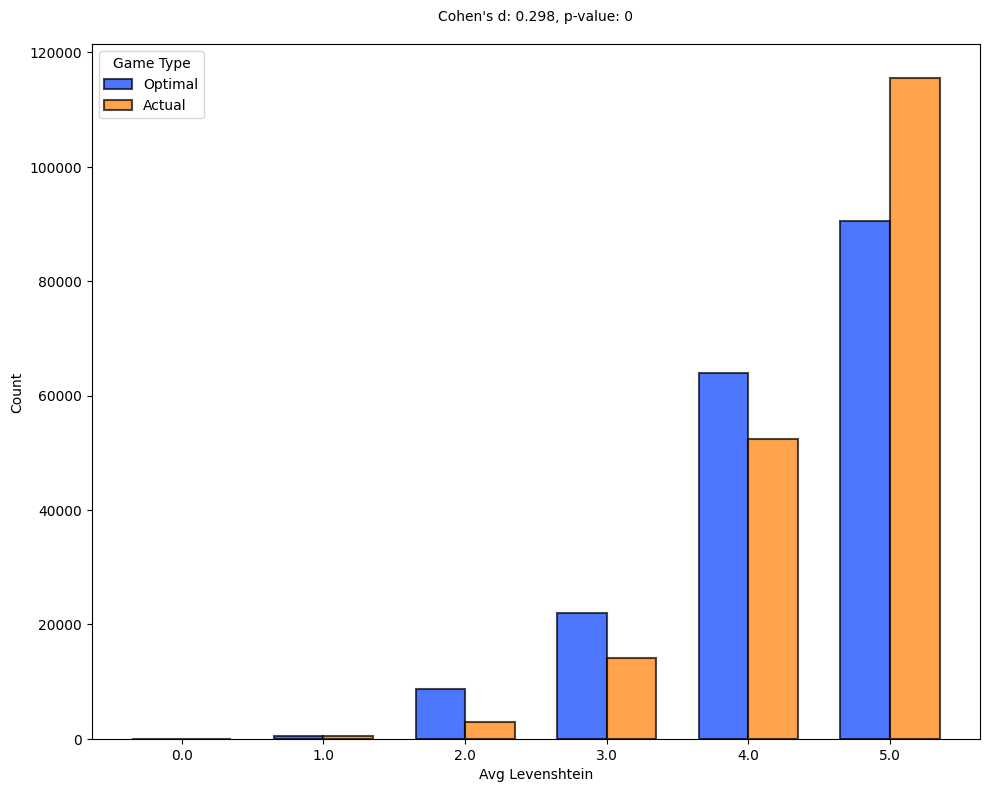

In [19]:
analyzer.plot_comparison_histogram('avg_levenshtein', save_pdf=False, save_data=True, overlay=False)


In [5]:
analyzer.df

,entry_id,author,wordle_guesses,num_guesses,wordle_answer,wordle_title,wordle_id,hard_mode,optimal
0,1,u/pantomime15,"[world, leafs, clang, bantu, banal]",5,banal,Wordle,201,False,"[[(world, 244), (saice, 8)], [(leafs, 21), (ba..."
1,2,u/McIgglyTuffMuffin,"[cries, daddy, water, manor, bangs, banal]",6,banal,Wordle,201,False,"[[(cries, 256), (tonal, 1)], [(daddy, 30), (ta..."
2,3,u/Rt002k,"[mouse, trail, halal, papal, canal, banal]",6,banal,Wordle,201,True,"[[(mouse, 327), (clint, 3)], [(trail, 5), (ban..."
3,4,u/Simplyx69,"[arose, taunt, naval, banal]",4,banal,Wordle,201,True,"[[(arose, 148), (clint, 4)], [(taunt, 16), (ca..."
4,5,u/hitstun,"[stale, along, final, canal, banal]",5,banal,Wordle,201,True,"[[(stale, 57), (loral, 8)], [(along, 7), (bana..."
...,...,...,...,...,...,...,...,...,...
65266,82726,u/pianist-on-edge,"[munch, manly]",2,manly,Wordle,560,True,"[[(munch, 12), (aygre, 1)]]"
65267,82732,u/Kinda-Insomniac,"[ouija, polar, molar]",3,molar,Wordle,559,False,"[[(ouija, 112), (larnt, 4)], [(polar, 2), (mol..."
65268,82749,u/Bogus4Real,"[synch, adieu, polar, molar]",4,molar,Wordle,559,True,"[[(synch, 645), (artel, 7)], [(adieu, 39), (ra..."
65269,82863,u/pianist-on-edge,"[flesh, heron, whine]",3,whine,Wordle,561,True,"[[(flesh, 40), (carte, 4)], [(heron, 2), (nich..."


In [7]:
def get_state(answer, guess):
    count_letters = Counter(answer)
    state = [0] * 5
    # print(count_letters)

    # This marks the greens
    for index, letter in enumerate(guess):
        # print(letter)
        if letter in count_letters:
            # print(f'letter: {letter}')
            if letter == answer[index] and count_letters[letter] > 0:
                state[index] = 2
                count_letters[letter] -= 1

    # This marks the yellows
    for index, letter in enumerate(guess):
        if letter in count_letters:
            if count_letters[letter] > 0 and state[index] == 0:
                state[index] = 1
                count_letters[letter] -= 1

    subset = [0] * 3

    for s in state:
        subset[2-s] += 1

    return "".join(map(str, subset))


In [8]:
try:
    df = pd.read_csv('data/state_data.csv')
except FileNotFoundError:
    os.chdir("../")
    print(f"Changed dir to {os.getcwd()}")
    df = pd.read_csv('data/merged_data.csv')
    print("Loaded data from 'data/merged_data.csv'")

df.head(1)


,state,previous_guesses,optimal_guess,human_guess
0,14,"[['world'], ['arose'], ['tares'], ['learn'], [...","['SAICE', 'CLINT', 'PLINK', 'MUILS', 'SKINT', ...","['leafs', 'taunt', 'manly', 'tools', 'stink', ..."


In [9]:
prev = literal_eval(df["previous_guesses"][0])
opt = literal_eval(df["optimal_guess"][0])
human = literal_eval(df["human_guess"][0])
print(prev, "\n", len(prev))
print(opt, "\n" ,len(opt))
print(human, "\n", len(human))

[['world'], ['arose'], ['tares'], ['learn'], ['arose'], ['aegis'], ['party'], ['about'], ['about', 'under'], ['roped'], ['tales'], ['steal'], ['aegis'], ['spike'], ['nests'], ['audio'], ['pleas'], ['cares', 'spoil'], ['least'], ['least', 'fiend'], ['stern', 'cloud'], ['aegis', 'youth', 'brand'], ['steam'], ['train'], ['mouse', 'train'], ['media'], ['pouch'], ['stair'], ['ouija'], ['lares', 'ratio'], ['train'], ['train', 'drops'], ['lares', 'ratio'], ['train'], ['train', 'drops'], ['since'], ['melon'], ['south'], ['teach'], ['shine'], ['aegis'], ['aegis', 'youth', 'brand'], ['brisk'], ['brisk', 'plead', 'where', 'count'], ['helps'], ['faker', 'boars', 'creed', 'until'], ['aegis'], ['token'], ['court'], ['court', 'spear'], ['stare', 'pound'], ['haste'], ['place'], ['stare', 'mound'], ['train'], ['space'], ['lares'], ['stare'], ['tears'], ['soare'], ['kauri'], ['short'], ['aegis'], ['roams'], ['stare'], ['music'], ['loser'], ['weary'], ['weary', 'scour'], ['spend', 'fight'], ['paddy'], ['

In [10]:
prev

[['world'],
 ['arose'],
 ['tares'],
 ['learn'],
 ['arose'],
 ['aegis'],
 ['party'],
 ['about'],
 ['about', 'under'],
 ['roped'],
 ['tales'],
 ['steal'],
 ['aegis'],
 ['spike'],
 ['nests'],
 ['audio'],
 ['pleas'],
 ['cares', 'spoil'],
 ['least'],
 ['least', 'fiend'],
 ['stern', 'cloud'],
 ['aegis', 'youth', 'brand'],
 ['steam'],
 ['train'],
 ['mouse', 'train'],
 ['media'],
 ['pouch'],
 ['stair'],
 ['ouija'],
 ['lares', 'ratio'],
 ['train'],
 ['train', 'drops'],
 ['lares', 'ratio'],
 ['train'],
 ['train', 'drops'],
 ['since'],
 ['melon'],
 ['south'],
 ['teach'],
 ['shine'],
 ['aegis'],
 ['aegis', 'youth', 'brand'],
 ['brisk'],
 ['brisk', 'plead', 'where', 'count'],
 ['helps'],
 ['faker', 'boars', 'creed', 'until'],
 ['aegis'],
 ['token'],
 ['court'],
 ['court', 'spear'],
 ['stare', 'pound'],
 ['haste'],
 ['place'],
 ['stare', 'mound'],
 ['train'],
 ['space'],
 ['lares'],
 ['stare'],
 ['tears'],
 ['soare'],
 ['kauri'],
 ['short'],
 ['aegis'],
 ['roams'],
 ['stare'],
 ['music'],
 ['loser']

In [11]:
answer = 'banal' #for world guess
get_state(answer=answer, guess='world') #212 = 2 green (b and a), 1 yellow (n), 2 grey (d and y)
# should be 014 according to the state_data.csv

'014'

In [20]:
# get df when state is 005
lst_h = []
lst_o = []
state_idx = df[df['state'] == 5].index[0] # 14 = '014' get index of
og = literal_eval(df["optimal_guess"][state_idx])
hg = literal_eval(df["human_guess"][state_idx])
pg = literal_eval(df["previous_guesses"].values[state_idx])

for i, guess in tqdm.tqdm(enumerate(hg)):
    dist_h = WordleAnalyzer.glove_distance(guess.lower(), pg[i][-1].lower(), model=analyzer.glove_distance_model, dec_place=3)
    if dist_h is not None:
        lst_h.append(dist_h)

for i, guess in tqdm.tqdm(enumerate(og)):
    dist_o = WordleAnalyzer.glove_distance(guess.lower(), pg[i][-1].lower(), model=analyzer.glove_distance_model, dec_place=3)
    if dist_o is not None:
        lst_o.append(dist_o)

13067it [00:00, 123959.81it/s]
13067it [00:00, 162026.16it/s]


In [21]:
print(WordleAnalyzer.glove_distance('cards', 'raile', dec_place=3))

None


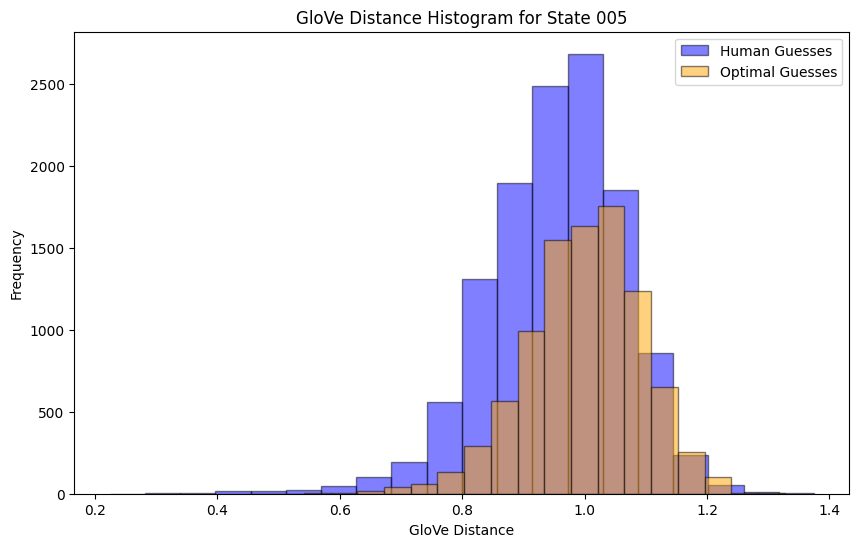

-0.43412480004084847

In [22]:
# plot lst_h and lst_o over each other in a histogram with 50 bins and opacity of 0.5
plt.figure(figsize=(10, 6))
plt.hist(lst_h, bins=20, alpha=0.5, label='Human Guesses', color='blue', edgecolor='black')
plt.hist(lst_o, bins=20, alpha=0.5, label='Optimal Guesses', color='orange', edgecolor='black')
plt.title('GloVe Distance Histogram for State 005')
plt.xlabel('GloVe Distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# get cohen's d of the two distributions
from scipy import stats
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    sdx = np.std(x, ddof=1)
    sdy = np.std(y, ddof=1)
    s = np.sqrt(((nx - 1) * sdx ** 2 + (ny - 1) * sdy ** 2) / dof)
    return (np.mean(x) - np.mean(y)) / s
cohen_d(lst_h, lst_o)
